大家好，我是「K同学啊 」！

前几天翻译了一篇讲十大CNN结构的文章（[「多图」图解10大CNN架构](https://mp.weixin.qq.com/s/lL7TMLwojCXWpgPXbt-FYQ)），原作者思路十分清晰，从时间线上，将近年来CNN发展过程中一些比较重要的网络模型做了一一介绍。我发现其中好像有几个网络模型并没有在《深度学习100例》出现，接下一段时间我将围绕这些网络模型进行实战讲解。

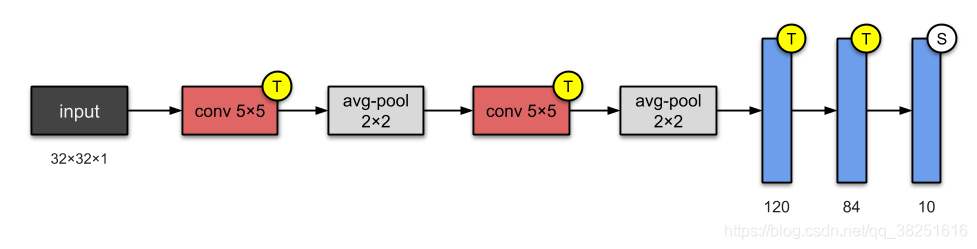

在90年代，由于支持向量机（Support Vecotr Machine，SVM）等算法的发展，深度学习的发展受到了很大的阻碍（尽管Geoffery Hinton在1986年发明的BP算法（Backpropagation）解决了神经网络的非线性分类学习的问题，但**梯度消失的问题没有得到很好的解决**）。但Yann LeCun等人坚持不懈，依然在该领域苦苦研究。1998年，Yann LeCun提出了LeNet-5网络。**LeNet-5被誉为是卷积神经网络的“Hello Word”**，足以见其重要性。

**LeNet-5 是最简单的架构之一。它有 2 个卷积层和 3 个全连接层**（LeNet-5 中的“5”——神经网络的名称通常来自于它们所具有的卷积层和全连接层的数量）。我们现在所知道的平均池化层被称为子采样层，它具有可训练的权重。这个架构有**大约60,000 个参数**。

**📝刊物**

- 论文：[Gradient-Based Learning Applied to Document Recognition](http://yann.lecun.com/exdb/publis/index.html#lecun-98)
- 作者：Yann LeCun、Léon Bottou、Yoshua Bengio 和 Patrick Haffner
- 发表于： IEEE Proceedings of the IEEE (1998)

🚀 我的环境：

- 语言环境：Python3.6.5
- 编译器：jupyter notebook
- 深度学习环境：TensorFlow2.4.1
- 显卡（GPU）：NVIDIA GeForce RTX 3080

**🚀 来自专栏：[《深度学习100例》](https://blog.csdn.net/qq_38251616/category_11068756.html)**

如果你是一名深度学习小白可以先看看我这个专门为你写的专栏：[《小白入门深度学习》](https://blog.csdn.net/qq_38251616/category_11188161.html)

# 一、前期工作

## 1. 设置GPU

如果使用的是CPU可以忽略这步

In [39]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    gpu0 = gpus[0] #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True) #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpu0],"GPU")

## 2. 导入数据

In [29]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import os,PIL
import tensorflow as tf
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

#隐藏警告
import warnings
warnings.filterwarnings('ignore')

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## 3. 归一化

In [3]:
# 将像素的值标准化至0到1的区间内。
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

## 4. 可视化

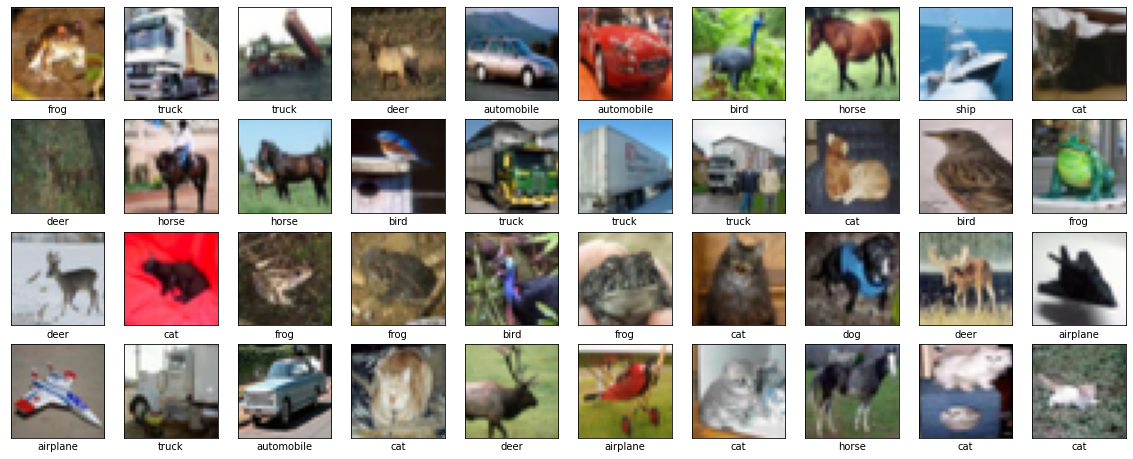

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(20,10))
for i in range(40):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# 二、构建CNN网络

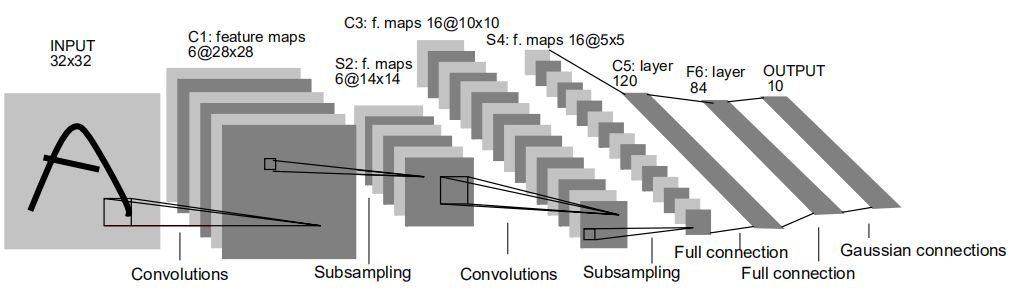

In [5]:
batch = 32
model = keras.Sequential([
    # 卷积层1
    keras.layers.Conv2D(6, 5),                         # 使用6个5*5的卷积核对单通道32*32的图片进行卷积，结果得到6个28*28的特征图
    keras.layers.MaxPooling2D(pool_size=2, strides=2), # 对28*28的特征图进行2*2最大池化，得到14*14的特征图
    keras.layers.ReLU(),                               # ReLU激活函数 
    # 卷积层2
    keras.layers.Conv2D(16, 5),                        # 使用16个5*5的卷积核对6通道14*14的图片进行卷积，结果得到16个10*10的特征图
    keras.layers.MaxPooling2D(pool_size=2, strides=2), # 对10*10的特征图进行2*2最大池化，得到5*5的特征图
    keras.layers.ReLU(),                               # ReLU激活函数
    # 卷积层3
    keras.layers.Conv2D(120, 5),  # 使用120个5*5的卷积核对16通道5*5的图片进行卷积，结果得到120个1*1的特征图
    keras.layers.ReLU(),          # ReLU激活函数
    # 将 (None, 1, 1, 120) 的下采样图片拉伸成 (None, 120) 的形状
    keras.layers.Flatten(),
    # 全连接层1
    keras.layers.Dense(84, activation='relu'),    # 32*84
    # 全连接层2
    keras.layers.Dense(10, activation='softmax')  # 32*10
])
model.build(input_shape=(batch, 32, 32, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (32, 28, 28, 6)           456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 14, 14, 6)           0         
_________________________________________________________________
re_lu (ReLU)                 (32, 14, 14, 6)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 10, 10, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 5, 5, 16)            0         
_________________________________________________________________
re_lu_1 (ReLU)               (32, 5, 5, 16)            0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 1, 1, 120)           4

# 三、编译

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 四、训练模型

In [7]:
epochs = 20

history = model.fit(train_images, train_labels, epochs=epochs,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 23s 14ms/step - loss: 1.8339 - accuracy: 0.3194 - val_loss: 1.4007 - val_accuracy: 0.4835
Epoch 2/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.3719 - accuracy: 0.5025 - val_loss: 1.3414 - val_accuracy: 0.5132
Epoch 3/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.2513 - accuracy: 0.5491 - val_loss: 1.3219 - val_accuracy: 0.5325
Epoch 4/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1727 - accuracy: 0.5844 - val_loss: 1.1992 - val_accuracy: 0.5750
Epoch 5/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1033 - accuracy: 0.6095 - val_loss: 1.1453 - val_accuracy: 0.5905
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0547 - accuracy: 0.6256 - val_loss: 1.1279 - val_accuracy: 0.6002
Epoch 7/20
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0104 - accuracy: 0.6423 - val_loss: 1.1566 -

# 五、预测

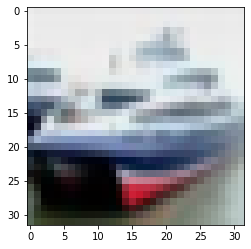

In [8]:
plt.imshow(test_images[1])

In [9]:
import numpy as np

pre = model.predict(test_images)
print(class_names[np.argmax(pre[1])])

ship


# 六、模型评估

## 1. Accuracy与Loss图

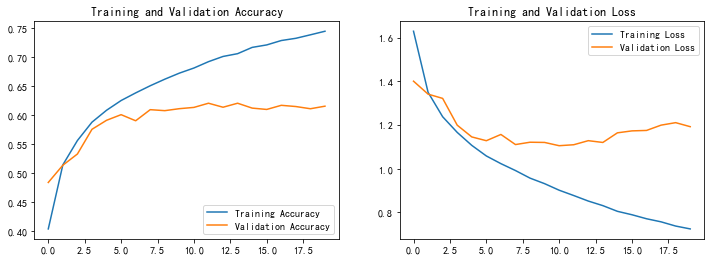

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

作为早期的网络模型，LeNet-5的不足（过拟合）也在这里体现出来了，也正是这些不完美才有了CNN后面的发展。

## 2. 混淆矩阵

Seaborn 是一个画图库，它基于 Matplotlib 核心库进行了更高阶的 API 封装，可以让你轻松地画出更漂亮的图形。Seaborn 的漂亮主要体现在配色更加舒服、以及图形元素的样式更加细腻。

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# 定义一个绘制混淆矩阵图的函数
def plot_cm(labels, predictions):
    
    # 生成混淆矩阵
    conf_numpy = confusion_matrix(labels, predictions)
    # 将矩阵转化为 DataFrame
    conf_df = pd.DataFrame(conf_numpy, index=class_names ,columns=class_names)  
    
    plt.figure(figsize=(8,7))
    
    sns.heatmap(conf_df, annot=True, fmt="d", cmap="BuPu")
    
    plt.title('混淆矩阵',fontsize=15)
    plt.ylabel('真实值',fontsize=14)
    plt.xlabel('预测值',fontsize=14)

In [41]:
val_pre   = []
val_label = []

#这里可以取部分验证数据生成混淆矩阵
for image, label in zip(test_images[:200], test_labels[:200]):
    # 需要给图片增加一个维度
    img_array = tf.expand_dims(image, 0) 
    # 使用模型预测图片
    prediction = model.predict(img_array)

    val_pre.append(class_names[np.argmax(prediction)])
    val_label.append(class_names[label[0]])

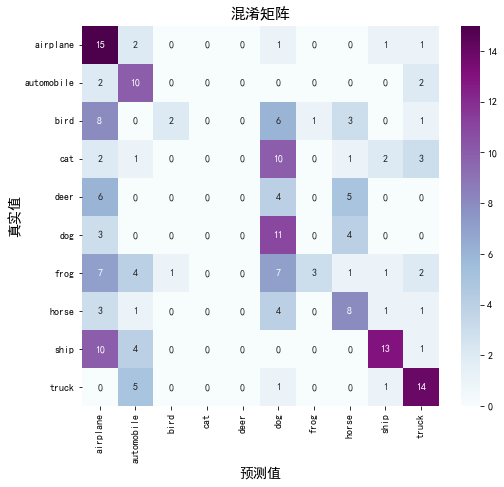

In [42]:
plot_cm(val_label, val_pre)

# 七、同系列作品

🚀 **深度学习新人必看：[《小白入门深度学习》](https://blog.csdn.net/qq_38251616/category_11188161.html)**

1. [小白入门深度学习 | 第一篇：配置深度学习环境](https://mtyjkh.blog.csdn.net/article/details/118575238)
2. [小白入门深度学习 | 第二篇：编译器的使用-Jupyter Notebook](https://mtyjkh.blog.csdn.net/article/details/118814364)
3. [小白入门深度学习 | 第三篇：深度学习初体验](https://mtyjkh.blog.csdn.net/article/details/119081309)

🚀 往期精彩-卷积神经网络篇：

1. [深度学习100例-卷积神经网络（CNN）实现mnist手写数字识别 | 第1天](https://mtyjkh.blog.csdn.net/article/details/116920825) 
2. [深度学习100例-卷积神经网络（CNN）彩色图片分类 | 第2天](https://mtyjkh.blog.csdn.net/article/details/116978213)
3. [深度学习100例-卷积神经网络（CNN）服装图像分类 | 第3天](https://mtyjkh.blog.csdn.net/article/details/116992196)
4. [深度学习100例-卷积神经网络（CNN）花朵识别 | 第4天](https://mtyjkh.blog.csdn.net/article/details/117079919)
5. [深度学习100例-卷积神经网络（CNN）天气识别 | 第5天](https://mtyjkh.blog.csdn.net/article/details/117186183)
6. [深度学习100例-卷积神经网络（VGG-16）识别海贼王草帽一伙 | 第6天](https://mtyjkh.blog.csdn.net/article/details/117331631)
7. [深度学习100例-卷积神经网络（VGG-19）识别灵笼中的人物 | 第7天](https://mtyjkh.blog.csdn.net/article/details/117395797)
8. [深度学习100例-卷积神经网络（ResNet-50）鸟类识别 | 第8天](https://mtyjkh.blog.csdn.net/article/details/117587326)
9. [深度学习100例-卷积神经网络（AlexNet）手把手教学 | 第11天](https://mtyjkh.blog.csdn.net/article/details/117986183)
10. [深度学习100例-卷积神经网络（CNN）识别验证码 | 第12天](https://mtyjkh.blog.csdn.net/article/details/118211253)
11. [深度学习100例-卷积神经网络（Inception V3）识别手语 | 第13天](https://mtyjkh.blog.csdn.net/article/details/118310170)
12. [深度学习100例-卷积神经网络（Inception-ResNet-v2）识别交通标志 | 第14天](https://mtyjkh.blog.csdn.net/article/details/118389790)
13. [深度学习100例-卷积神经网络（CNN）实现车牌识别 | 第15天](https://mtyjkh.blog.csdn.net/article/details/118422302)
14. [深度学习100例-卷积神经网络（CNN）识别神奇宝贝小智一伙 | 第16天](https://mtyjkh.blog.csdn.net/article/details/118631541)
15. [深度学习100例-卷积神经网络（CNN）注意力检测 | 第17天](https://mtyjkh.blog.csdn.net/article/details/118938811)

🚀 往期精彩-循环神经网络篇：

1. [深度学习100例-循环神经网络（RNN）实现股票预测 | 第9天](https://mtyjkh.blog.csdn.net/article/details/117752046)
2. [深度学习100例-循环神经网络（LSTM）实现股票预测 | 第10天](https://mtyjkh.blog.csdn.net/article/details/117907074)

🚀 往期精彩-生成对抗网络篇：

1. [深度学习100例-生成对抗网络（GAN）手写数字生成 | 第18天](https://mtyjkh.blog.csdn.net/article/details/118995896)
2. [深度学习100例-生成对抗网络（DCGAN）手写数字生成 | 第19天](https://mtyjkh.blog.csdn.net/article/details/119133575)
3. [深度学习100例-生成对抗网络（DCGAN）生成动漫小姐姐 | 第20天](https://mtyjkh.blog.csdn.net/article/details/119182578)


**🚀 本文选自专栏：[《深度学习100例》](https://blog.csdn.net/qq_38251616/category_11068756.html)**

**💖先赞后看，再收藏，养成好习惯！💖**